In [23]:
import os
from utilities import (extract_image_from_pdf, extract_xml_from_digital_pdf,
                       create_directory, read_directory_files, get_subdirectories,
                       get_string_xmltree, get_xmltree, get_specific_tags, get_page_texts_ordered,
                       get_page_text_element_attrib, get_ngram
                      )
from xml_document_info import (get_xml_info)
from vertical_spacing_main import main, draw_bbox_coord
from box_horizontal_operations import (merge_horizontal_blocks)
from box_vertical_operations import (merge_vertical_blocks)

import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import copy
import json

## Draw the boxes on document pages

In [2]:
def draw_box(filepath, desired_width, desired_height, df, color="green", save=False):
    image  = Image.open(filepath)
    image  = image.resize((desired_width, desired_height))
    draw   = ImageDraw.Draw(image)
    
    for index, row in df.iterrows():
        left   = int(row['text_left'])
        right  = int(row['text_width'] + left)
        top    = int(row['text_top'])
        bottom = int(row["text_height"] + top)
        
        draw.rectangle(((left, top), (right,bottom)), outline=color)
    save_filepath = os.path.join(os.path.dirname(filepath), 'processed_' + os.path.basename(filepath))
    if save:
        image.save(save_filepath)
    
    return image

def show_df(df):
    return df.head(df.shape[0])

## start of program

In [25]:
base_dir   = '/home/dhiraj/Documents/Anuwad/document-structure/data'
input_dir  = os.path.join(base_dir, 'input')
output_dir = os.path.join(base_dir, 'output')
filename   = '20695_2010_8_1501_20635_Judgement_17-Feb-2020.pdf'


os.system('mkdir -p {0}'.format(input_dir))

os.system('mkdir -p {0}'.format(output_dir))

0

In [26]:
pdf_filepath   = os.path.join(input_dir, filename)
working_dir    = os.path.join(output_dir, os.path.splitext(filename)[0])

ret            = create_directory(working_dir)

pdf_image_dir  = extract_image_from_pdf(pdf_filepath, working_dir)
pdf_xml_dir    = extract_xml_from_digital_pdf(pdf_filepath, working_dir)

xml_files      = read_directory_files(pdf_xml_dir, pattern='*.xml')
# print(xml_files, "\n\n")
image_files    = read_directory_files(pdf_image_dir, pattern='*-*.jpg')
# print(image_files)
print("Extracted xml & images of file: %s" % (filename))

Extracted xml & images of file: 20695_2010_8_1501_20635_Judgement_17-Feb-2020.pdf


In [27]:
xml_dfs, page_width, page_height = get_xml_info(xml_files[0])

Total number of pages (54) in file (20695_2010_8_1501_20635_Judgement_17-Feb-2020.xml)


In [28]:
document_configs = {
    'HORI_BLOCK_WDTH_DIFF_PERC': 0.85,
    'SUPERSCRIPT_HEIGHT_DIFFERENCE': 7.0,
    'HORI_SPACE_TOO_CLOSE': 10.0,
    
    'VERTICAL_SPACE_TOO_CLOSE': 5.0,
    'AVERAGE_VERTICAL_SPACE': 12.0,
    'LEFT_OR_RIGHT_ALIGNMENT_MARGIN': 20.0
}

In [40]:
file_index=2
img_filepath   = image_files[file_index]
df             = xml_dfs[file_index]


# vertical spacings

In [41]:
# dataframe = main(image_files,xml_dfs, page_width, page_height,document_configs)

# #####draw bounding boxes
# draw_bbox_coord(image_files, dataframe)

In [42]:
# dataframe

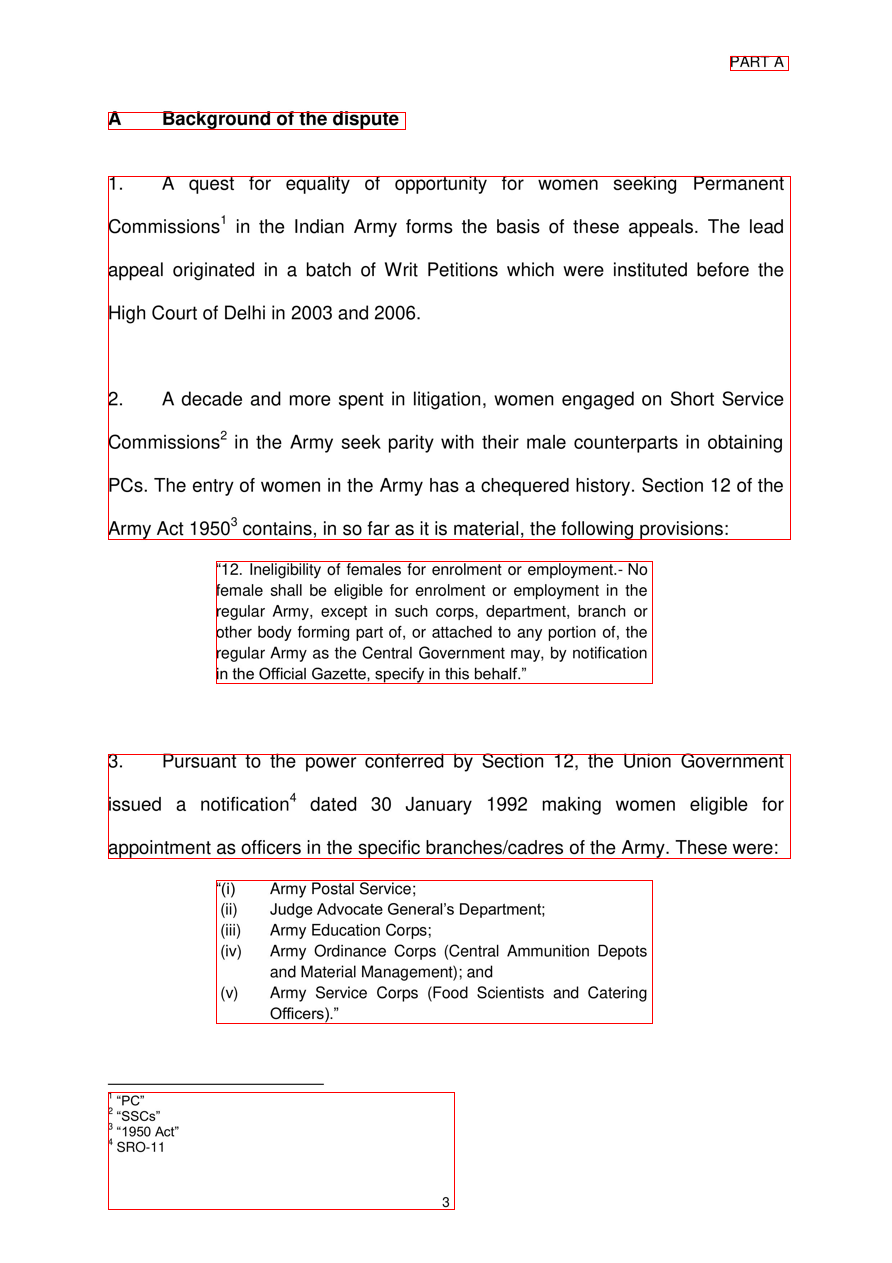

In [66]:
in_df   = df.loc[:]

h_df    = merge_horizontal_blocks(in_df, document_configs, debug=False)
v_df    = merge_vertical_blocks(h_df, document_configs, debug=False)

draw_box(img_filepath, page_width, page_height, v_df, color='red')
# show_df(h_df)


In [44]:
show_df(v_df)


,xml_index,text_top,text_left,text_width,text_height,text,font_size,font_family,font_color,children
0,0,56,730,58,14,PART A,14,Arial,#000000,None
1,2,112,108,297,17,A Background of the dispute,18,"Arial,Bold",#000000,None
2,4,176,108,682,363,1. A quest for equality of opportunity ...,18,Arial,#000000,"{""xml_index"":{""2"":4,""3"":6,""4"":9,""5"":10,""6"":11,..."
3,20,561,216,436,122,“12. Ineligibility of females for enrolment or...,15,Arial,#000000,"{""xml_index"":{""10"":20,""11"":21,""12"":22,""13"":23,..."
4,26,754,108,682,104,3. Pursuant to the power conferred by S...,18,Arial,#000000,"{""xml_index"":{""16"":26,""17"":28,""18"":31},""text_t..."
5,32,880,216,436,143,“(i) Army Postal Service; Judge Advocate Gen...,15,Arial,#000000,"{""xml_index"":{""19"":32,""20"":34,""21"":36,""22"":38,..."
6,1,1092,108,346,117,1 “PC” 2 “SSCs” 3 “1950 Act” 4 SRO-11 3,13,Arial,#000000,"{""xml_index"":{""26"":44,""27"":46,""28"":48,""29"":50,..."


In [56]:
pd.DataFrame(json.loads(v_df['children'][2]))

,xml_index,text_top,text_left,text_width,text_height,text,font_size,font_family,font_color,children
2,4,176,108,682,17,1. A quest for equality of opportunity ...,18,Arial,#000000,"{""xml_index"":{""3"":4,""4"":5},""text_top"":{""3"":176..."
3,6,215,108,682,22,1 Commissions in the Indian Army forms ...,18,Arial,#000000,"{""xml_index"":{""5"":7,""6"":6,""7"":8},""text_top"":{""..."
4,9,263,108,682,17,appeal originated in a batch of Writ Pe...,18,Arial,#000000,None
5,10,306,108,319,17,High Court of Delhi in 2003 and 2006.,18,Arial,#000000,None
6,11,392,108,682,17,"A decade and more spent in litigation, ...",18,Arial,#000000,"{""xml_index"":{""10"":12,""11"":11},""text_top"":{""10..."
7,13,431,108,681,21,2 Commissions in the Army seek parity w...,18,Arial,#000000,"{""xml_index"":{""12"":14,""13"":13,""14"":15},""text_t..."
8,16,478,108,682,17,PCs. The entry of women in the Army has a cheq...,18,Arial,#000000,None
9,17,517,108,632,22,"3 Army Act 1950 contains, in so far as it is ...",18,Arial,#000000,"{""xml_index"":{""16"":18,""17"":17,""18"":19},""text_t..."


In [64]:
pd.DataFrame(json.loads(pd.DataFrame(json.loads(v_df['children'][2]))['children'][1]))

,xml_index,text_top,text_left,text_width,text_height,text,font_size,font_family,font_color
5,7,215,221,7,11,1,12,Arial,#000000
6,6,220,108,112,17,Commissions,18,Arial,#000000
7,8,220,227,563,17,in the Indian Army forms the basis of...,18,Arial,#000000


In [34]:

    
def process_page_blocks(page_df, configs, debug=False):
    cols      = page_df.columns.values.tolist()
    df        = pd.DataFrame(columns=cols)
    
    block_index = 0
    for index, row in page_df.iterrows():
        if row['children'] == None:
            df.loc[block_index] = page_df.iloc[index]
            block_index += 1
        else:
            dfs = process_block(page_df.iloc[index]['children'])
            block_index += 1
    return df

In [35]:
def process_block(children):
    in_df      = pd.read_json(children)
    df         = in_df.copy(deep=True)
    df         = in_df.reset_index()
    
#     c_df = pd.read_json(block_df['children'])
#     c_df.reset_index(drop=True)
    return in_df

In [14]:
p_df = process_page_blocks(v_df, document_configs)

In [15]:
c_df = process_block(v_df['children'][0])
show_df(c_df)

ValueError: Invalid file path or buffer object type: <class 'NoneType'>

,xml_index,text_top,text_left,text_width,text_height,text,font_size,font_family,font_color,children
1,1,166,232,439,23,IN THE HIGH COURT OF JUDICATURE AT MADRAS,19,CAAAAA+TrebuchetMS,#000000,None
2,2,215,363,176,23,DATED: 05.02.2020,19,CAAAAA+TrebuchetMS,#000000,None
3,3,263,415,71,23,CORAM:,19,CAAAAA+TrebuchetMS,#000000,None
4,4,311,209,485,23,THE HONOURABLE MR. JUSTICE N.ANAND VENKATESH,19,CAAAAA+TrebuchetMS,#000000,None
5,5,359,348,206,23,Cont.P.No.123 of 2020,19,CAAAAA+TrebuchetMS,#000000,None


In [73]:
def process_block(children,image):
    # Assuming PIL image as input
    in_df      = pd.read_json(children)
    df         = in_df.copy(deep=True)
    df         = in_df.reset_index()
    
#     c_df = pd.read_json(block_df['children'])
#     c_df.reset_index(drop=True)
    return in_df




    
def process_page_blocks(page_df,image, configs, debug=False):
    cols      = page_df.columns.values.tolist()
    df        = pd.DataFrame(columns=cols)
    
    block_index = 0
    for index, row in page_df.iterrows():
        if row['children'] == None:
            df.loc[block_index] = page_df.iloc[index]
            block_index += 1
        else:
            dfs = process_block(page_df.iloc[index]['children'],image)
            block_index += 1
    return df

In [68]:
type(img)

PIL.Image.Image

In [71]:
import numpy as np
im =

In [72]:
im.shape

(1263, 892, 3)